# **1. XỬ LÝ DỮ LIỆU**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install scipy==1.8.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import networkx as nx
from networkx.algorithms import bipartite
import pandas as pd
import matplotlib.pyplot as plt
import community.community_louvain as community_louvain
import matplotlib.cm as cm
import matplotlib
import numpy as np
from google.colab import files

In [ ]:
xbox = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/XboxOne_GameSales.csv',usecols=['Publisher', 'Genre'], header=0, encoding='unicode_escape')
xbox.dropna(inplace = True)
xbox.drop_duplicates(inplace=True)
xbox

Genre                   Publisher
0              Action              Rockstar Games
1             Shooter                  Activision
3    Action-Adventure              Rockstar Games
4                Misc           Microsoft Studios
6             Shooter             Electronic Arts
..                ...                         ...
605      Role-Playing                    Soedesco
606      Role-Playing                     Unknown
607          Strategy                     Unknown
610          Platform                  THQ Nordic
612            Action  Bandai Namco Entertainment

[241 rows x 2 columns]

In [ ]:
publisher = xbox['Publisher']
genre = xbox['Genre']
print('Số lượng nhà sản xuất:', publisher.nunique())
print('Số lượng thể loại:', genre.nunique())
print('Số cạnh:', len(xbox))

Số lượng nhà sản xuất: 98
Số lượng thể loại: 16
Số cạnh: 241


# **2. ĐỒ THỊ 2 HƯỚNG**

In [ ]:
  gr = nx.Graph()
  for index, row in xbox.iterrows():
    gr.add_edge(row['Publisher'], row['Genre'], weight = 1)
  gr.add_nodes_from(publisher, bipartite = 0) 
  gr.add_nodes_from(genre, bipartite = 1)

<Figure size 864x864 with 0 Axes>

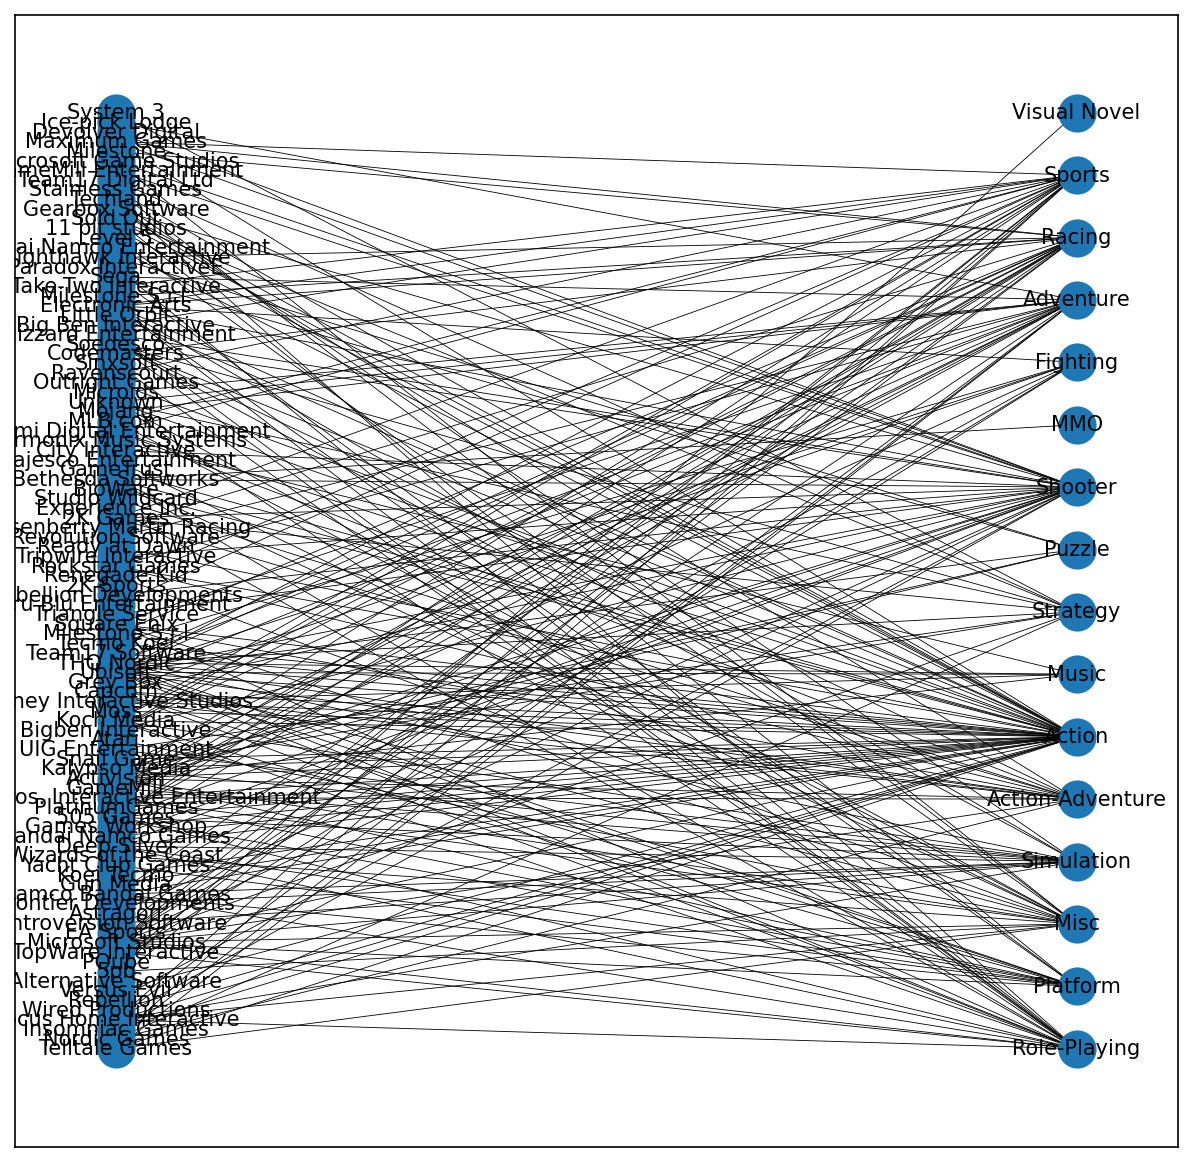

In [ ]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(gr)
fig, ax = plt.subplots(1, 1, figsize=(10,10), dpi=150)
nx.draw_networkx(gr, pos = nx.drawing.layout.bipartite_layout(gr, publisher), font_size=10, width=0.4)

# **3. ĐỒ THỊ 1 HƯỚNG**

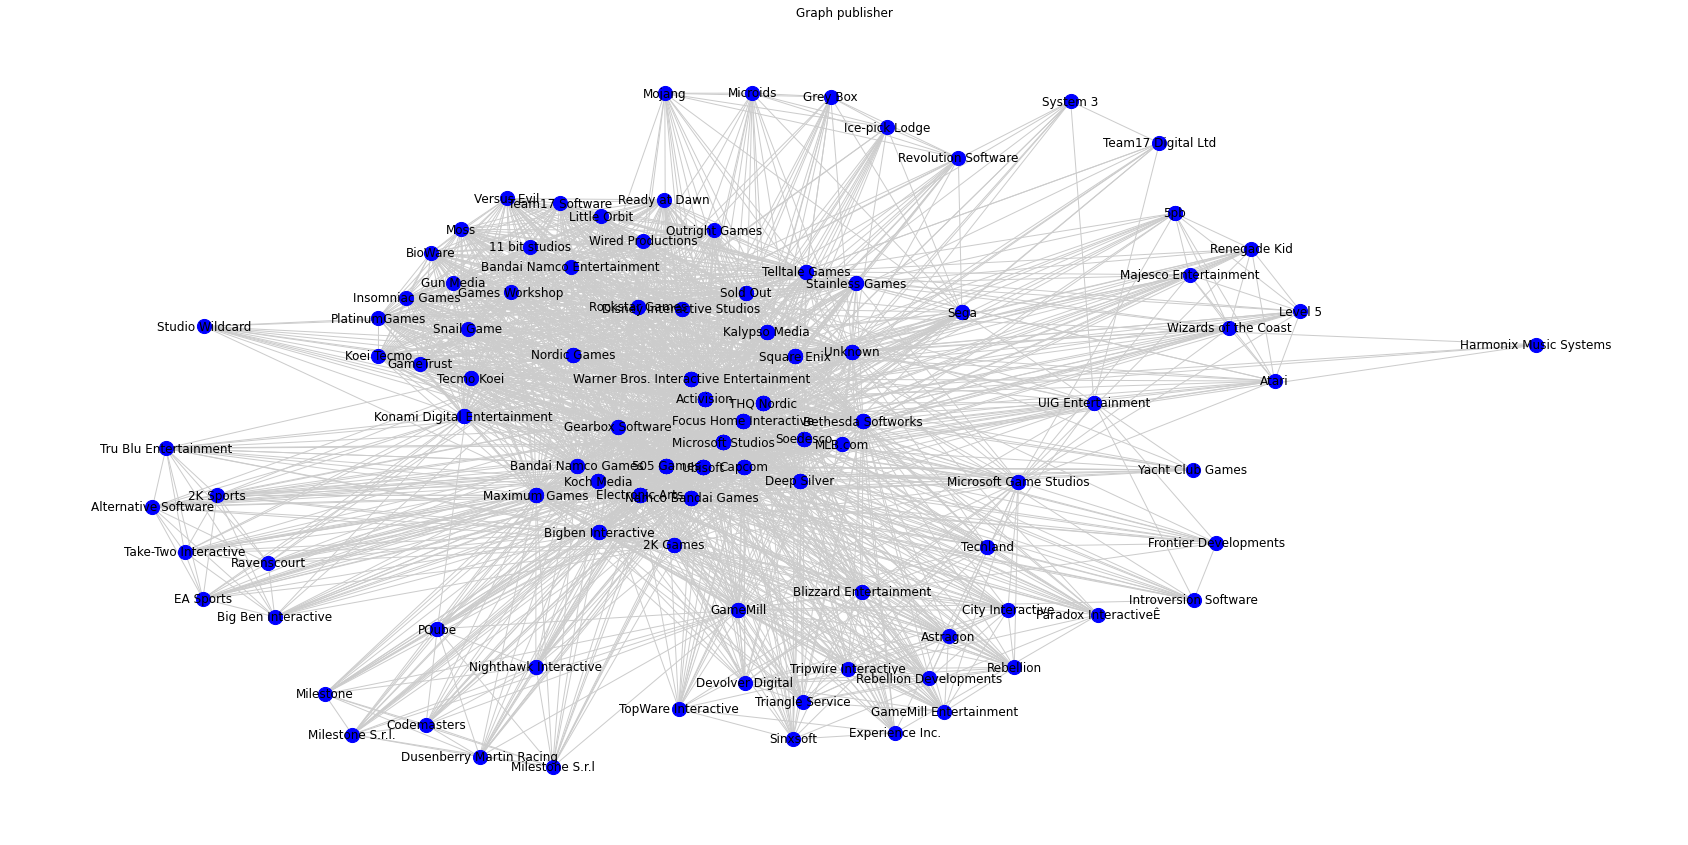

In [ ]:
G = bipartite.weighted_projected_graph(gr, publisher.unique())
plt.figure(figsize=(30,15))
layout = nx.spring_layout(G)
nx.draw_networkx_nodes(G, layout, nodelist=publisher, node_size=200, node_color='blue')
nx.draw_networkx_edges(G, layout, edge_color='#cccccc')
node_labels = dict(zip(publisher, publisher))
nx.draw_networkx_labels(G, layout,  labels=node_labels)
plt.axis('off')
plt.title("Graph publisher")

plt.show()

## Xuất dữ liệu đồ thị 1 hướng

In [ ]:
#XUẤT DATAFRAME CỦA ĐỒ THỊ 1 HƯỚNG RA FILE EXCEL
labels = nx.get_edge_attributes(G, 'weight')
xbox2 = pd.DataFrame(columns=['source', 'target', 'weight'])
for key, value in labels.items():
    xbox2 = xbox2.append({'source':key[0], 'target':key[1], 'weight':value}, ignore_index=True)
    xbox2.to_csv (r'xboxGephi.csv', index = False, header=True)

# **4. CENTRALITY**

## Degree Centrality

In [ ]:
degree_dict = { node: 0 for node in G.nodes() }
for node in G.nodes():
  degree_dict[node] = len(list(G.neighbors(node)))
  print(node,":",degree_dict[node])

Rockstar Games : 53
Activision : 81
Microsoft Studios : 96
Electronic Arts : 82
Bethesda Softworks : 68
Ubisoft : 87
EA Sports : 19
Blizzard Entertainment : 35
2K Sports : 19
Warner Bros. Interactive Entertainment : 70
Namco Bandai Games : 63
Square Enix : 67
505 Games : 87
2K Games : 48
Capcom : 66
Konami Digital Entertainment : 55
Mojang : 18
Gearbox Software : 58
Harmonix Music Systems : 4
Take-Two Interactive : 19
Disney Interactive Studios : 47
Sega : 27
Studio Wildcard : 14
Bandai Namco Games : 63
Focus Home Interactive : 85
Deep Silver : 66
Rebellion Developments : 25
Telltale Games : 59
Gun Media : 43
Codemasters : 18
Majesco Entertainment : 17
Koch Media : 73
Astragon : 25
City Interactive : 25
Sold Out : 50
Tecmo Koei : 44
Insomniac Games : 43
THQ Nordic : 74
Milestone S.r.l. : 18
Dusenberry Martin Racing : 18
Soedesco : 68
Koei Tecmo : 43
Bigben Interactive : 57
Milestone : 18
Milestone S.r.l : 18
Frontier Developments : 14
Nordic Games : 41
PQube : 20
Ravenscourt : 19
Syste

## Betweeness Centrality

In [ ]:
BetweenessCentrality = nx.betweenness_centrality(G)
sortedbetweenessCentrality =  dict(sorted(BetweenessCentrality.items(), key=lambda item: item[1], reverse=True))
for attr, value in sortedbetweenessCentrality.items():
        print(attr, ":", value)

Microsoft Studios : 0.07114689749137487
Ubisoft : 0.05095916175918034
505 Games : 0.04411942360500921
Focus Home Interactive : 0.04327689229372793
Activision : 0.04057356613442463
Electronic Arts : 0.034501073861015155
THQ Nordic : 0.03335547885335734
Koch Media : 0.024773140123386266
Warner Bros. Interactive Entertainment : 0.02379690402593759
Unknown : 0.022370655356465124
Maximum Games : 0.021291091240345023
Soedesco : 0.01799947761870683
Square Enix : 0.01729000969914421
Bigben Interactive : 0.01714064867407715
Bethesda Softworks : 0.01677283086511764
Deep Silver : 0.013410237279158016
Namco Bandai Games : 0.013374188413709675
Capcom : 0.012809191715927709
Kalypso Media : 0.01205044901816269
Bandai Namco Games : 0.01149031917825604
2K Games : 0.010460293557605109
Telltale Games : 0.010270932858757166
Nordic Games : 0.007915425200957766
Konami Digital Entertainment : 0.00704962480600599
Gearbox Software : 0.00638499919290335
GameMill : 0.005790268523309409
Stainless Games : 0.004922

## Closeness Centrality

In [ ]:
closenessCentrality = nx.closeness_centrality(G)
sortedClosenessCentrality =  dict(sorted(closenessCentrality.items(), key=lambda item: item[1], reverse=True))
for attr, value in sortedClosenessCentrality.items():
        print(attr, ":", value)

Microsoft Studios : 0.9897959183673469
Ubisoft : 0.9065420560747663
505 Games : 0.9065420560747663
Focus Home Interactive : 0.8899082568807339
Electronic Arts : 0.8660714285714286
Activision : 0.8584070796460177
THQ Nordic : 0.8083333333333333
Koch Media : 0.8016528925619835
Maximum Games : 0.7950819672131147
Warner Bros. Interactive Entertainment : 0.782258064516129
Unknown : 0.776
Bethesda Softworks : 0.7698412698412699
Soedesco : 0.7698412698412699
Square Enix : 0.7637795275590551
Capcom : 0.7578125
Deep Silver : 0.7578125
Namco Bandai Games : 0.7404580152671756
Bandai Namco Games : 0.7404580152671756
Kalypso Media : 0.7238805970149254
Telltale Games : 0.7185185185185186
Gearbox Software : 0.7132352941176471
Bigben Interactive : 0.708029197080292
Konami Digital Entertainment : 0.697841726618705
Rockstar Games : 0.6879432624113475
Stainless Games : 0.6783216783216783
Sold Out : 0.6736111111111112
2K Games : 0.6643835616438356
Disney Interactive Studios : 0.6598639455782312
Tecmo Koei

## EigenVector Centrality

In [ ]:
eigenVectorCentrality = nx.eigenvector_centrality(G, weight='weight')
sortedEigenVectorCentrality =  dict(sorted(eigenVectorCentrality.items(), key=lambda item: item[1], reverse=True))
for attr, value in sortedEigenVectorCentrality.items():
        print(attr, ":", value)

Microsoft Studios : 0.30759402735818403
Ubisoft : 0.26518519175991573
505 Games : 0.24578157590566627
Electronic Arts : 0.23583043189157954
THQ Nordic : 0.23164725859098773
Activision : 0.22366645129885196
Focus Home Interactive : 0.21711503863536866
Warner Bros. Interactive Entertainment : 0.19484133771580422
Koch Media : 0.19156729055212082
Capcom : 0.18990722559913675
Soedesco : 0.18555797362777046
Namco Bandai Games : 0.18138610659703605
Deep Silver : 0.17561416220176904
Square Enix : 0.16248987996959724
Unknown : 0.15166010040134656
Bethesda Softworks : 0.14737635786621692
Maximum Games : 0.14488904658919752
Kalypso Media : 0.12878687709913797
Bandai Namco Games : 0.1201000581724643
Gearbox Software : 0.11880086359113723
Bigben Interactive : 0.11311787075545736
Konami Digital Entertainment : 0.11027643756157805
Rockstar Games : 0.11024999452404168
Telltale Games : 0.10697584907196779
Sold Out : 0.10080547806899302
2K Games : 0.10014536050935317
Disney Interactive Studios : 0.09266

## PageRank

Microsoft Studios : 0.03833672207635825
Ubisoft : 0.0325561149198455
505 Games : 0.029974053161854166
Activision : 0.028213591842641862
Electronic Arts : 0.02794768054365362
Focus Home Interactive : 0.027814413530446832
THQ Nordic : 0.027315199636558204
Warner Bros. Interactive Entertainment : 0.023243681626236155
Koch Media : 0.022595316236044806
Soedesco : 0.022208707800499456
Capcom : 0.021164467360225855
Namco Bandai Games : 0.02026255940869951
Deep Silver : 0.02018075410867337
Square Enix : 0.019998927741736484
Unknown : 0.01960457307270238
Maximum Games : 0.019205144293703798
Bethesda Softworks : 0.01884469370801208
Kalypso Media : 0.016385880132330503
Bandai Namco Games : 0.015759449828159244
Bigben Interactive : 0.015500029687843319
Gearbox Software : 0.01480467819648459
Telltale Games : 0.014588592375875085
Konami Digital Entertainment : 0.014013978441736224
Rockstar Games : 0.013706913494368603
2K Games : 0.013259680344368224
Sold Out : 0.012257803578599413
Nordic Games : 0.0

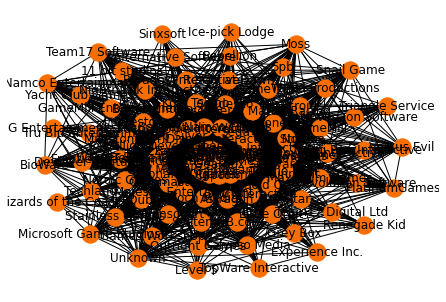

In [ ]:
ppr1 = nx.pagerank(G)
sortedRank = dict(sorted(ppr1.items(), key=lambda item: item[1], reverse=True))
for attr, value in sortedRank.items():
        print(attr, ":", value)
pos = nx.spiral_layout(G)
nx.draw(G, pos, with_labels = True, node_color="#f86e00")
plt.show()

# **5. GRAPH MINING**

## Girvan Newman

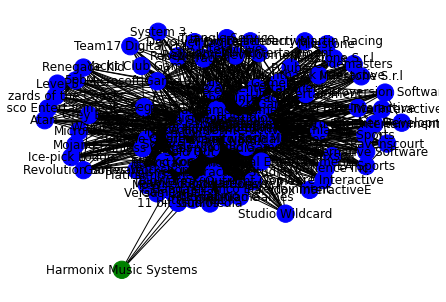

In [ ]:
from networkx.algorithms.community.centrality import girvan_newman
communities = girvan_newman(G)
node_groups = []
for com in next(communities):
  node_groups.append(list(com))

color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    elif node in node_groups[1]: 
        color_map.append('green')
    else:
        color_map.append('black')  
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

## Louvain

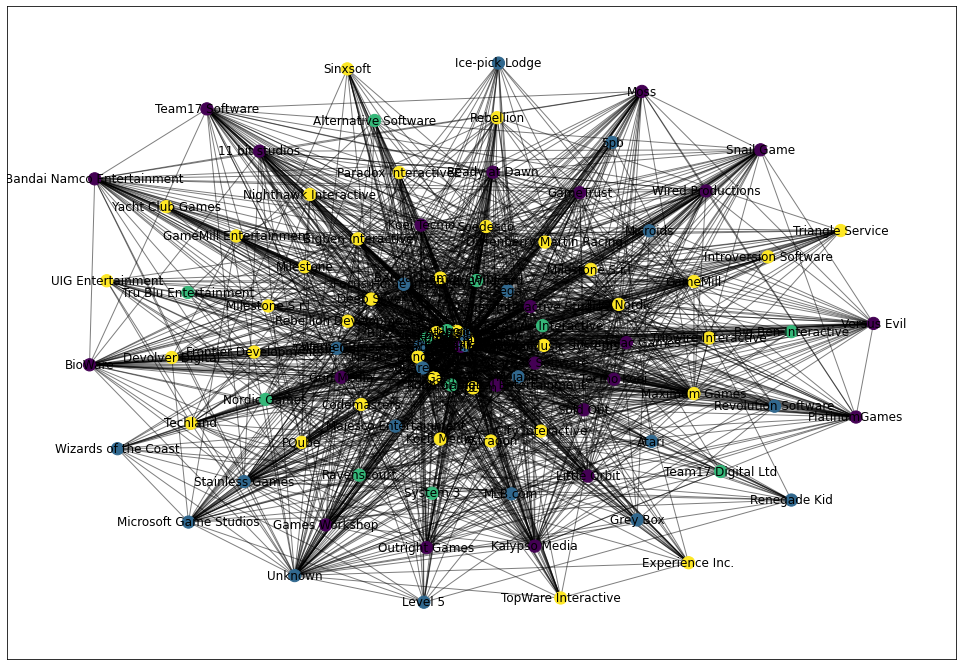

In [ ]:
plt.figure(figsize=(17, 12))
#compute the best partition
partition = community_louvain.best_partition(G)
#color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=150, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos)

plt.show()

In [ ]:
values = list(partition.values())

print("Số lượng cụm: ", len(np.unique(values)))
print()


groups = [] 
print("Phân cụm")
for i in range(len(np.unique(values))):
  print("Cụm ", i)
  values = []
  for name, k in partition.items():
    if k == i:
       print(name, end=' | ')
       values.append(name)
  groups.append(values) # Thêm vào group
  print()
  print()

Số lượng cụm:  4

Phân cụm
Cụm  0
Rockstar Games | Konami Digital Entertainment | Gearbox Software | Disney Interactive Studios | Gun Media | Sold Out | Tecmo Koei | Insomniac Games | Koei Tecmo | Little Orbit | GameTrust | Ready at Dawn | Games Workshop | Outright Games | Kalypso Media | Wired Productions | 11 bit studios | BioWare | PlatinumGames | Versus Evil | Snail Game | Moss | Team17 Software | Bandai Namco Entertainment | 

Cụm  1
Activision | Bethesda Softworks | Warner Bros. Interactive Entertainment | Square Enix | Mojang | Sega | Focus Home Interactive | Telltale Games | Majesco Entertainment | MLB.com | Atari | Microids | Stainless Games | Grey Box | Revolution Software | 5pb | Wizards of the Coast | Microsoft Game Studios | Unknown | Level 5 | Renegade Kid | Ice-pick Lodge | 

Cụm  2
EA Sports | 2K Sports | 2K Games | Take-Two Interactive | Studio Wildcard | Nordic Games | Ravenscourt | System 3 | Tru Blu Entertainment | Team17 Digital Ltd | Big Ben Interactive | Alternat

In [ ]:
group_0 = xbox.loc[xbox["Publisher"].isin(groups[0])]
print(group_0)

                Genre                     Publisher
0              Action                Rockstar Games
3    Action-Adventure                Rockstar Games
84             Action  Konami Digital Entertainment
91             Action              Gearbox Software
120  Action-Adventure    Disney Interactive Studios
137            Action    Disney Interactive Studios
173  Action-Adventure  Konami Digital Entertainment
176            Action                     Gun Media
179         Adventure                Rockstar Games
207             Music    Disney Interactive Studios
225            Sports  Konami Digital Entertainment
227            Action                      Sold Out
231            Action                    Tecmo Koei
241            Action               Insomniac Games
267          Fighting                    Tecmo Koei
271          Platform                      Sold Out
273  Action-Adventure              Gearbox Software
274           Shooter              Gearbox Software
276         

In [ ]:
group_1 = xbox.loc[xbox["Publisher"].isin(groups[1])]
print(group_1)

            Genre                               Publisher
1         Shooter                              Activision
7    Role-Playing                      Bethesda Softworks
42       Fighting  Warner Bros. Interactive Entertainment
50      Adventure                             Square Enix
51         Action  Warner Bros. Interactive Entertainment
..            ...                                     ...
527          Misc                                     5pb
552        Action                                 Unknown
565     Adventure                          Ice-pick Lodge
606  Role-Playing                                 Unknown
607      Strategy                                 Unknown

[62 rows x 2 columns]


In [ ]:
group_2 = xbox.loc[xbox["Publisher"].isin(groups[2])]
print(group_2)

                Genre              Publisher
18             Sports              EA Sports
28             Sports              2K Sports
70   Action-Adventure               2K Games
106           Shooter               2K Games
111            Sports   Take-Two Interactive
119            Sports               2K Games
136  Action-Adventure        Studio Wildcard
211          Strategy               2K Games
288  Action-Adventure           Nordic Games
293            Sports            Ravenscourt
295          Strategy               System 3
312            Sports           Nordic Games
355            Sports  Tru Blu Entertainment
374          Strategy     Team17 Digital Ltd
383            Sports    Big Ben Interactive
413            Sports   Alternative Software
417          Strategy           Nordic Games
509         Adventure           Nordic Games


In [ ]:
group_3 = xbox.loc[xbox["Publisher"].isin(groups[3])]
print(group_3)

                Genre           Publisher
4                Misc   Microsoft Studios
6             Shooter     Electronic Arts
8             Shooter   Microsoft Studios
11             Racing   Microsoft Studios
12             Sports     Electronic Arts
..                ...                 ...
591  Action-Adventure            Soedesco
599             Music          THQ Nordic
601           Shooter  Bandai Namco Games
605      Role-Playing            Soedesco
610          Platform          THQ Nordic

[122 rows x 2 columns]


In [ ]:
result0 = pd.pivot_table(group_0, values = "Publisher", index=["Genre"], aggfunc=np.count_nonzero)
result0 = result0.reset_index(["Genre"])
result0.sort_values(by = "Publisher", ascending = False)
group_0.to_csv("group0.csv", index = False, header = True, encoding = "utf-8")

result1 = pd.pivot_table(group_1, values = "Publisher", index=["Genre"], aggfunc=np.count_nonzero)
result1 = result1.reset_index(["Genre"])
result1.sort_values(by = "Publisher", ascending = False)
group_1.to_csv("group1.csv", index = False, header = True, encoding = "utf-8")

result2 = pd.pivot_table(group_2, values = "Publisher", index=["Genre"], aggfunc=np.count_nonzero)
result2 = result2.reset_index(["Genre"])
result2.sort_values(by = "Publisher", ascending = False)
group_2.to_csv("group2.csv", index = False, header = True, encoding = "utf-8")

result3 = pd.pivot_table(group_3, values = "Publisher", index=["Genre"], aggfunc=np.count_nonzero)
result3 = result3.reset_index(["Genre"])
result3.sort_values(by = "Publisher", ascending = False)
group_3.to_csv("group3.csv", index = False, header = True, encoding = "utf-8")

In [ ]:
files.download(r'group0.csv')
files.download(r'group1.csv')
files.download(r'group2.csv')
files.download(r'group3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>